In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from scipy.signal import butter, filtfilt
import pwlf



In [2]:
def RunMean(x,WL):
    """performs a moving average of input variable x that uses a
window length WL"""
    N = np.size(x,0) 
    xrunarr = np.zeros(N)
    whole = round(WL/2)
    for i in range(0,N):
        # Next we define the indices over which we average
        # Take care around the edges
        imin = np.max([i-whole,0])
        imax = np.min([i+whole,N]) 
        xrunarr[i] = np.mean(x[imin:imax]) 
    return(xrunarr)

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w


In [4]:
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

In [5]:

def load_and_clean_velocity_data(csv_path, min_velocity=100):
    """Load velocity CSV, convert dates, and remove velocities < min_velocity"""
    df = pd.read_csv(csv_path)
    df['mid_date'] = pd.to_datetime(df['mid_date'], errors='coerce')
    df['year'] = df['mid_date'].dt.year + (df['mid_date'].dt.dayofyear - 1) / 365.25

    vel = df['v [m/yr]'].values
    years = df['year'].values

    mask = vel >= min_velocity
    vel_clean = vel[mask]
    years_clean = years[mask]

    return years_clean, vel_clean

In [21]:
csv_paths = [
    "/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/slightlymoreupstream/LAT56.873--LON-132.3655.csv",
    "/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/slightlymoreupstream/LAT56.8466--LON-132.3379.csv", 
    "/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/slightlymoreupstream/LAT56.8544--LON-132.3463.csv", 
    "/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/slightlymoreupstream/LAT56.8631--LON-132.3598.csv",
    "/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/slightlymoreupstream/LAT56.8834--LON-132.3706.csv"
]

labels = [
    "(LAT56.873--LON-132.3655)",
    "(LAT56.8466--LON-132.3379)",
    "(LAT56.8544--LON-132.3463)",
    "(LAT56.8631--LON-132.3598)",
    "(LAT56.8834--LON-132.3706)"

]

colors = ['blue', 'red', 'orange', 'green', 'purple']  # one color per point
dotcolors = ['lightsteelblue', 'lightcoral', 'bisque', 'lightgreen', 'plum']  # one color per point


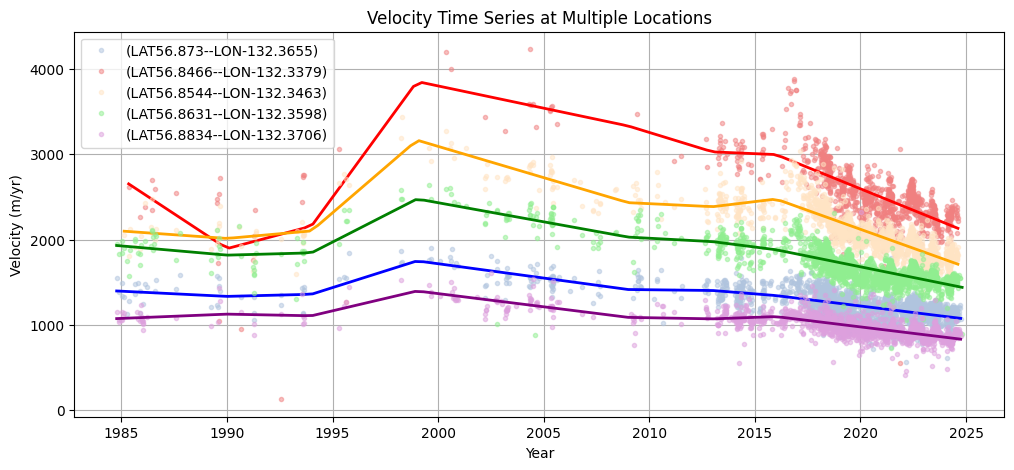

In [32]:
fig = plt.figure(figsize = (12,5))
for i, csv in enumerate(csv_paths):
    df = pd.read_csv(csv)
    label = labels[i]
    color = colors[i]
    dotcolor = dotcolors[i]

    # convert to datetime and decimal year
    df['mid_date'] = pd.to_datetime(df['mid_date'], errors='coerce')
    df['decimal_year'] = df['mid_date'].dt.year + (df['mid_date'].dt.dayofyear - 1) / 365.25

    vel = df['v [m/yr]'].values
    years = df['decimal_year'].values

    # remove outliers
    mask = vel >= 100
    vel_clean = vel[mask]
    years_clean = years[mask]

    # fit model
    model = pwlf.PiecewiseLinFit(years_clean, vel_clean)
    breaks = [years_clean.min(), 1990, 1994, 1999, 2009, 2013, 2016, years_clean.max()]
    model.fit_with_breaks(breaks)

    x_pred = np.linspace(years_clean.min(), years_clean.max(), 100)
    y_pred = model.predict(x_pred)

    # plot data and fit
    plt.plot(years_clean, vel_clean, '.', color=dotcolor, label=label, alpha=0.5)
    plt.plot(x_pred, y_pred, '-', linewidth=2, color=color)


plt.xlabel('Year')
plt.ylabel('Velocity (m/yr)')
plt.title('Velocity Time Series at Multiple Locations')
plt.legend()
plt.grid(True)
plt.show()


# plt.xlabel('Year')
# plt.ylabel('Velocity (m/yr)')
# plt.title('Segmented Velocity Trends at Multiple Locations')
# plt.legend(title='Lat, Lon')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [8]:
itslive_dict_lower = {}
for csv in csv_paths:
    years_clean, vel_clean = load_and_clean_velocity_data(csv)
    itslive_dict_lower[csv] = (years_clean, vel_clean)


In [9]:
csv = "/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/slightlymoreupstream/LAT56.873--LON-132.3655.csv"
df = pd.read_csv(csv)
label = '(56.8715, -132.3638)'
df['mid_date'] = pd.to_datetime(df['mid_date'], errors='coerce')
df['year'] = df['mid_date'].dt.year + (df['mid_date'].dt.dayofyear - 1) / 365.25

# df['year'] = df['mid_date'].dt.year

vel = df['v [m/yr]'].values
# years = df['year'].values
mask = vel >= 100
vel_clean = vel[mask]
years_clean = years[mask]
x = years_clean
y = vel_clean
# print(df['mid_date'])

NameError: name 'years' is not defined

In [225]:
model = pwlf.PiecewiseLinFit(x, y)
num_segments = 7
breaks = model.fit(num_segments)
# breaks = [x.min(), 1990, 1994, 1999, 2009, 2013 ,2016,x.max()]
model.fit_with_breaks(breaks)

x_pred = np.linspace(np.min(x), np.max(x), 100)
y_pred = model.predict(x_pred)

KeyboardInterrupt: 

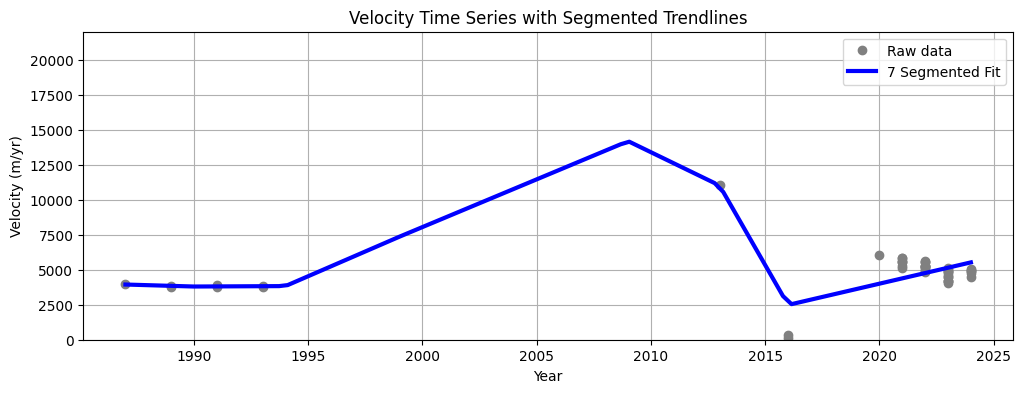

Breakpoints at years: [np.int32(1987), 1990, 1994, 1999, 2009, 2013, 2016, np.int32(2024)]


In [218]:
fig, ax = plt.subplots(figsize = (12,4))

plt.plot(x, y, 'o', color='gray', label='Raw data')
plt.plot(x_pred, y_pred, '-', linewidth=3, color='blue', label=f'{num_segments} Segmented Fit')
plt.xlabel('Year')
plt.ylabel('Velocity (m/yr)')
plt.ylim(0,22000)
plt.title('Velocity Time Series with Segmented Trendlines')
plt.legend()
plt.grid(True)
plt.show()

print("Breakpoints at years:", breaks)

In [ ]:
label = '(56.902, -132.3693)'

subset = df[df['label'] == label].sort_values('year')
years = subset['year'].values
vel = subset['v [m/yr]'].values

smoothed_vel = RunMean5(vel)



KeyError: 'label'

In [33]:
csv_files = glob.glob('/media/kayatroyer/KayaDrive/Thesis/Data/Its_LIVE_lower/*.csv')
df_list = [pd.read_csv(f, usecols=['lat', 'lon', 'mid_date', 'v [m/yr]']) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [ ]:
df['mid_date'] = pd.to_datetime(df['mid_date'], errors='coerce')
df.drop_duplicates(subset=['lat', 'lon', 'mid_date'], inplace=True)
df.sort_values(by=['lat', 'lon', 'mid_date'], inplace=True)
df['year'] = df['mid_date'].dt.year
df['label'] = df.apply(lambda row: f"({row['lat']:.3f}, {row['lon']:.3f})", axis=1)




In [44]:
def RunMean5(x):
    """ x_5pt = RunMean5(x) calculates the 5-point running mean of
     data array x. Array x must have only one dimension"""
    N = np.size(x,0) # how large is array x?
    x_5pt = np.zeros(N) # initialize array x_5pt
    # This for-loop goes over all the indices of the array Y
    for i in range(0,N):
        # Next we define the indices over which we average
        # Take care around the edges
        imin = np.max([i-2,0]) # lower bound on i, >= 0
        imax = np.min([i+3,N]) # Upper bound on i, <= N
        x_5pt[i] = np.mean(x[imin:imax]) # take 5pt ave

    return x_5pt # return output of function

In [45]:
smoothed_df = pd.DataFrame()

for label in df['label'].unique():
    subset = df[df['label'] == label].sort_values('year')
    vel = subset['v [m/yr]'].values
    
    smoothed_vel = RunMean5(vel)
    
    # Add smoothed velocities to subset
    subset['smoothed_velocity'] = smoothed_vel
    
    # Append to new dataframe
    smoothed_df = pd.concat([smoothed_df, subset], ignore_index=True)


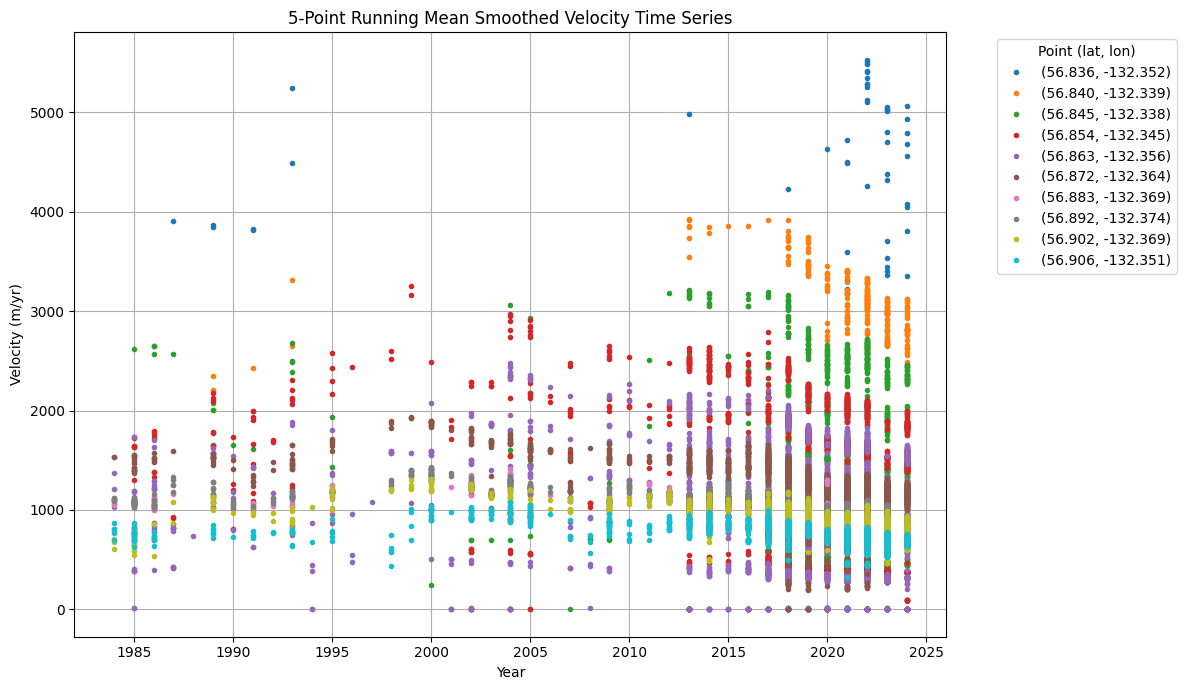

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,7))

for label in smoothed_df['label'].unique():
    point_data = smoothed_df[smoothed_df['label'] == label]
    # ax.plot(point_data['year'], point_data['v [m/yr]'], 'o--', alpha=0.3)
    ax.plot(point_data['year'], point_data['smoothed_velocity'], '.', linewidth=2, label=label)

ax.set_xlabel('Year')
ax.set_ylabel('Velocity (m/yr)')
ax.set_title('5-Point Running Mean Smoothed Velocity Time Series')
ax.legend(title='Point (lat, lon)', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()


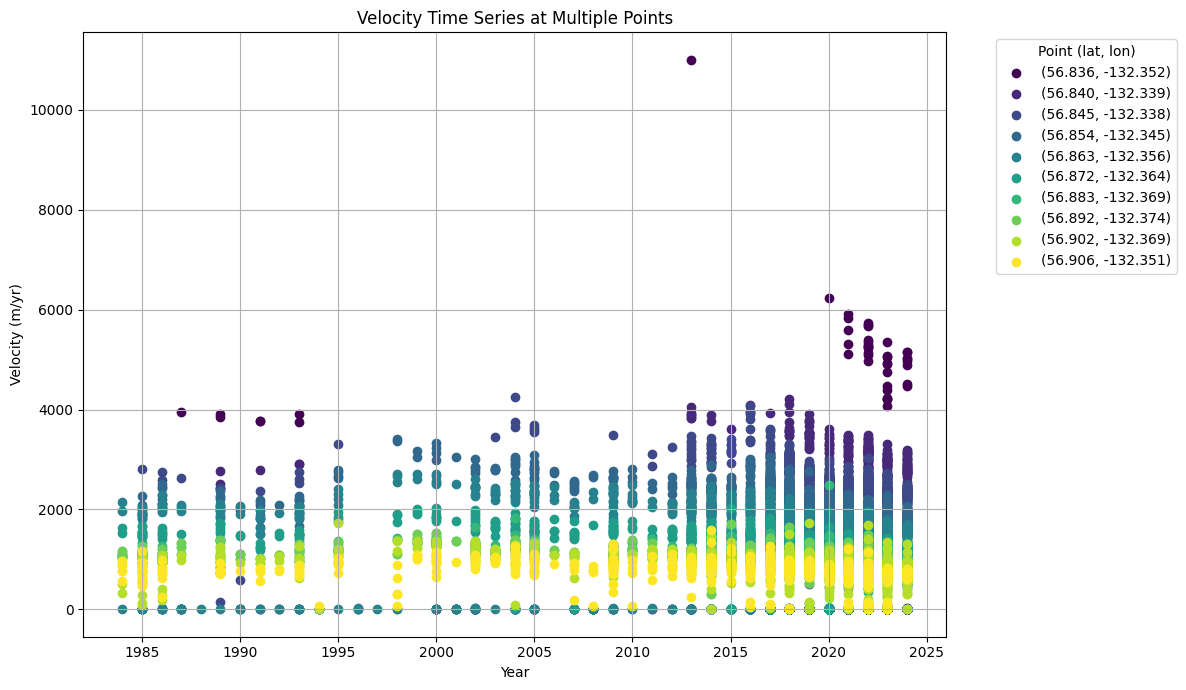

In [41]:
fig, ax = plt.subplots(figsize=(12, 7))

labels = df['label'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))


for color, label in zip(colors, labels):
    subset = df[df['label'] == label]
    ax.scatter(subset['year'], subset['v [m/yr]'], marker='o', label=label, color=color)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Velocity (m/yr)')
ax.set_title('Velocity Time Series at Multiple Points')

# Legend on side
ax.legend(title='Point (lat, lon)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid
ax.grid(True)

# Tight layout to handle legend outside
plt.tight_layout()

# Show plot
plt.show()